In [93]:
from scipy import *
from scipy import integrate
from scipy import optimize
from pylab import *
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from random import randrange

In [94]:
%matplotlib inline
plt.style.use('ggplot')
NUM_COLORS = 12
cm = plt.get_cmap('tab20')


In [95]:
def Cantor_Pairing(a,b):
    return int(0.5*(a+b)*(a+b+1)+b)

In [96]:
def Schroedinger_r_Derivative(y,r,l,En):
    (u,up) = y
    return array([up, (l*(l+1)/r**2-2/r-En)*u])

In [97]:
def Solve_Schroedinger_Derivative(En,l,R):
    Rb=R[::-1]
    du0=-1e-5
    urb=integrate.odeint(Schroedinger_r_Derivative, [0.0,du0], Rb, args=(l,En))
    ur=urb[:,0][::-1]
    norm=integrate.simps(ur**2,x=R)
    ur *= 1./sqrt(norm)
    return ur

In [98]:
def Shooting(En,R,l):
    Rb=R[::-1]
    du0=-1e-5
    ub=integrate.odeint(Schroedinger_r_Derivative, [0.0,du0], Rb, args=(l,En))
    ur=ub[:,0][::-1]
    norm=integrate.simps(ur**2,x=R)
    ur *= 1./sqrt(norm)
    
    ur = ur/R**l
    
    f0 = ur[0]
    f1 = ur[1]
    f_at_0 = f0 + (f1-f0)*(0.0-R[0])/(R[1]-R[0])
    return f_at_0

In [99]:
def PlotState(E,l,R,n,ax):
    ur = Solve_Schroedinger_Derivative(E,l,R)
    ax.plot(R,ur,'-',label=f"n={n:d},l={l:d}")

In [100]:
def FindBoundStates(R,l,nmax,Esearch, ax):
    n=l
    Ebnd=[]
    u0 = Shooting(Esearch[0],R,l)
    for i in range(1,len(Esearch)):
        u1 = Shooting(Esearch[i],R,l)
        if u0*u1<0:
            Ebound = optimize.brentq(Shooting,Esearch[i-1],Esearch[i],xtol=1e-16,args=(R,l))
            Ebnd.append((l,Ebound))
            n+=1
            PlotState(Ebound, l, R, n, ax)
            print(f"Found bound state n={n:d} l={l:d} at E={Ebound:.5f}. Exact energy: {-1.0/(n**2):.5f}")
            if len(Ebnd)>nmax: break
        u0=u1
    
    return Ebnd

Found bound state n=1 l=0 at E=-1.00000. Exact energy: -1.00000
Found bound state n=2 l=0 at E=-0.25000. Exact energy: -0.25000
Found bound state n=3 l=0 at E=-0.11111. Exact energy: -0.11111
Found bound state n=4 l=0 at E=-0.06250. Exact energy: -0.06250
Found bound state n=5 l=0 at E=-0.04000. Exact energy: -0.04000
Found bound state n=2 l=1 at E=-0.25000. Exact energy: -0.25000
Found bound state n=3 l=1 at E=-0.11111. Exact energy: -0.11111
Found bound state n=4 l=1 at E=-0.06250. Exact energy: -0.06250
Found bound state n=5 l=1 at E=-0.04000. Exact energy: -0.04000
Found bound state n=3 l=2 at E=-0.11111. Exact energy: -0.11111
Found bound state n=4 l=2 at E=-0.06250. Exact energy: -0.06250
Found bound state n=5 l=2 at E=-0.04000. Exact energy: -0.04000


Text(0.5, 1.0, 'First 12 states of the Hydrogen Atom')

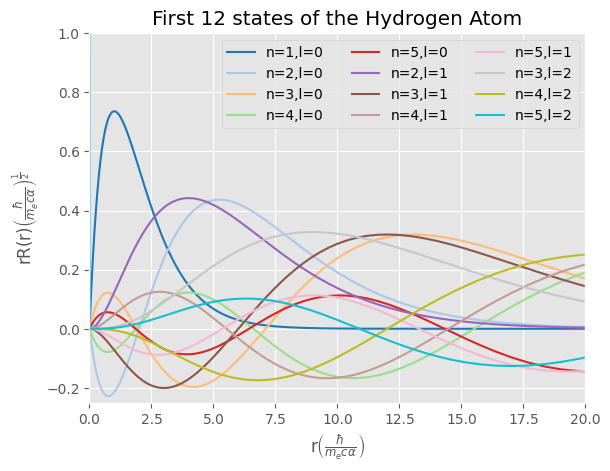

In [101]:
Esearch = -1.2/arange(1,20,0.2)**2
R = logspace(-6,2.2,500)
nmax=4

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])

for l in range(nmax-1):
    FindBoundStates(R,l,nmax-l,Esearch, ax)

plt.xlim([0,20])
plt.ylim([-0.25,1])
plt.legend(ncol=3)
plt.xlabel(r"r$\left(\frac{\hbar{}}{m_{e}c\alpha{}}\right)$")
plt.ylabel(r"rR(r)$\left(\frac{\hbar{}}{m_{e}c\alpha{}}\right)^{\frac{1}{2}}$")
plt.title("First 12 states of the Hydrogen Atom")

In [102]:
# l=0
# n=6
# En=-1.0/(n+l)**2

# R = logspace(-5,2.,500)
# ur = Solve_Schroedinger_Derivative(En,l,R)

# plot(R,ur,'o-')
# xlim([0,20])